In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [59]:
X = np.linspace(2.5,12,25)

w = np.random.randint(2,10,size=1)[0]

b = np.random.randint(-5,5,size=1)[0]

y = X*w + b + np.random.randn(25)*2

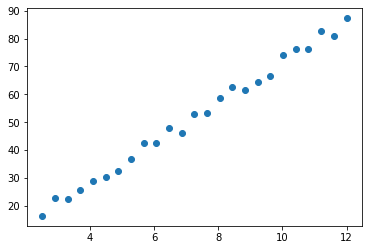

In [60]:
plt.scatter(X,y)

In [62]:
lr = LinearRegression(fit_intercept=True)

In [63]:
#X数据必须是二维的
lr.fit(X.reshape(-1,1),y)


LinearRegression()

In [64]:
lr.coef_

array([7.2717199])

In [65]:
lr.intercept_

-1.0226571412094643

In [66]:
w

7

In [67]:
b

0

In [ ]:
#如果要求斜率，LinearRegression也用梯度下降

In [68]:
#为了求解斜率和截距
class Linear_model(object):
    def __init__(self):
        self.w = np.random.randn(1)[0]
        
        self.b = np.random.randn(1)[0]
        print('------------------------起始随机生成 ',self.w,self.b)
    
    #Model就是方程 fx = wx + b 
    def model(self,x):
        return self.w * x + self.b

    #线性原理都是最小二乘法
    def loss(self,x,y):
        #方程中有几个未知数？？？
        cost = (y - self.model(x))**2
        #求偏导数,把其他都当成已知数
        #导数是偏导数的特殊形式，只有一个未知数的时候

        g_w = 2*(y- self.model(x))*(-x)
        g_b = 2*(y- self.model(x))*(-1)
        return g_w,g_b

    #开始梯度下降
    def gradient_descend(self,g_w,g_b,step = 0.01):
        #更新新的斜率和截距
        self.w = self.w - g_w*step
        self.b = self.b - g_b*step

        print('------------------------',self.w,self.b)


    def fit(self,X,y):

        w_last = self.w + 1
        b_last = self.b + 1

        precision = 0.00001
        max_count = 3000
        count = 0

        while True:
            if (np.abs(self.w - w_last) < precision) and (np.abs(self.b - b_last) < precision):
                break

            if count > max_count:
                break
            g_w = 0
            g_b = 0
            size = X.shape[0]
            for xi,yi in zip(X,y):
                self.loss(xi,yi)
                g_w += self.loss(xi,yi)[0]/size
                g_b += self.loss(xi,yi)[1]/size

                self.gradient_descend(g_w,g_b)
                count +=1

    def coef_(self):
        return self.w

    def intercept_(self):
        return self.b






In [69]:
lm = Linear_model()

------------------------起始随机生成  0.3203362290224375 1.0560800332494502


In [70]:
lm.fit(X,y)

-- 7.289683305206168 -1.0521828684931818
------------------------ 7.278346111941186 -1.054132083521405
------------------------ 7.277243252352626 -1.0542752396655535
------------------------ 7.273288828339681 -1.0548887569518688
------------------------ 7.2788085185299725 -1.0540353146196184
------------------------ 7.269254434458808 -1.055381085553477
------------------------ 7.2668458909321325 -1.055741264688096
------------------------ 7.257364064920403 -1.0570265597880624
------------------------ 7.257307059254492 -1.0571398565030565
------------------------ 7.27410236680446 -1.0552558420220948
------------------------ 7.2797847278207195 -1.0546298969600434
------------------------ 7.273256199636763 -1.055327027928715
------------------------ 7.249633073532856 -1.0578002210189401
------------------------ 7.246272166418396 -1.0582514047297609
------------------------ 7.258093678655198 -1.0572450761828605
------------------------ 7.259336042413585 -1.0572171659923453
----------------

In [71]:
lm.coef_()

7.2870608811174264

In [72]:
lm.intercept_()

-1.0551029318786245